In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

In [6]:
df = pd.read_csv("/content/TrafficTwoMonth (1).csv")

In [7]:
df['Traffic Situation'] = df['Traffic Situation'].replace({'low':0, 'normal':1,
                                                              'heavy':2, 'high':3})

In [8]:
df['Day of the week'].value_counts()

Day of the week
Tuesday      960
Wednesday    960
Thursday     960
Friday       768
Saturday     768
Sunday       768
Monday       768
Name: count, dtype: int64

In [9]:
df['Day of the week'] = df['Day of the week'].replace({'Monday':1,'Tuesday':2,
                                                          'Wednesday':3,'Thursday':4,
                                                          'Friday':5,'Saturday':6,
                                                          'Sunday':7})

In [10]:
test_temp = df.copy()

In [11]:
df= df.drop(columns = ['Time','Temp'], axis=1)
df

KeyError: "['Temp'] not found in axis"

In [12]:
df['hour'] = pd.to_datetime(df['Time']).dt.hour
df['minute'] = pd.to_datetime(df['Time']).dt.minute
df['Temp'] = df['Time'].apply(lambda x: x.split(' ')[1])
df['AM/PM'] = df['Temp'].replace({'AM':0,'PM':1})

<ipython-input-12-d7c5445840c8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['Time']).dt.hour
<ipython-input-12-d7c5445840c8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['minute'] = pd.to_datetime(df['Time']).dt.minute


In [13]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'hour', 'minute', 'Temp',
       'AM/PM'],
      dtype='object')

In [14]:
X= df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total','hour', 'minute', 'AM/PM']]

y= df['Traffic Situation'].values

In [15]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2 , random_state = 0)

In [16]:
train_X.shape,test_y.shape,test_X.shape,train_y.shape

((4761, 10), (1191,), (1191, 10), (4761,))

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

test_X_2d = tsne.fit_transform(test_X)

In [18]:

cl1 = LogisticRegression()
cl2 = RandomForestClassifier()
cl3 = SVC(probability=True)
cl4 = XGBClassifier()
cl5 = AdaBoostClassifier()
cl6 = KNeighborsClassifier()
cl7 = DecisionTreeClassifier()
cl8 = GaussianNB()
cl9 = GradientBoostingClassifier()
cl10 = SGDClassifier()

voting_cl = VotingClassifier(estimators=[
    ('lr', cl1),
    ('rf', cl2),
    ('svc', cl3),
    ('xgb', cl4),
    ('ada', cl5),
    ('knn', cl6),
    ('dt', cl7),
    ('gnb', cl8),
    ('cl9', cl9),
    ('cl10', cl10)
], voting='hard')

voting_cl.fit(train_X, train_y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('ada', AdaBoostClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('gnb', GaussianNB()),
                             ('cl9', GradientBoostingClassifier()),
                             ('cl10', SGDClassifier())])

In [19]:
from graphviz import Digraph

models = {
    'Logistic Regression': ('Input Features', 'Logistic Regression', 'Final Prediction', 'Features', 'Probability'),
    'Random Forest': ('Input Features', 'Random Forest', 'Final Prediction', 'Features', 'Prediction'),
    'SVM': ('Input Features', 'SVM', 'Final Prediction', 'Features', 'Prediction'),
    'XGBoost': ('Input Features', 'XGBoost', 'Final Prediction', 'Features', 'Prediction'),
    'AdaBoost': ('Input Features', 'AdaBoost', 'Final Prediction', 'Features', 'Prediction'),
    'K-Nearest Neighbors': ('Input Features', 'K-Nearest Neighbors', 'Final Prediction', 'Features', 'Prediction'),
    'Decision Tree': ('Input Features', 'Decision Tree', 'Final Prediction', 'Features', 'Prediction'),
    'Gaussian Naive Bayes': ('Input Features', 'Gaussian Naive Bayes', 'Final Prediction', 'Features', 'Prediction'),
    'Gradient Boosting': ('Input Features', 'Gradient Boosting', 'Final Prediction', 'Features', 'Prediction'),
    'Stochastic Gradient Descent': ('Input Features', 'Stochastic Gradient Descent', 'Final Prediction', 'Features', 'Prediction')
}

for model_name, (input_node, model_node, output_node, input_label, output_label) in models.items():
    dot = Digraph()

    dot.node('input', input_node)
    dot.node('model', model_node)
    dot.node('output', output_node)
    dot.edge('input', 'model', label=input_label)
    dot.edge('model', 'output', label=output_label)
    dot.attr(rankdir='LR')
    dot.render(f'{model_name}_block_diagram', format='png', cleanup=True)

In [20]:
from sklearn.metrics import accuracy_score

voting_pred = voting_cl.predict(test_X)
accuracy = accuracy_score(test_y, voting_pred)

In [21]:
from sklearn.model_selection import cross_val_score

for clf, label in zip([cl1, cl2, cl3, cl4, cl5, cl6, cl7, cl8, cl9, cl10], ['lr', 'rf', 'svc', 'xgb', 'ada', 'knn', 'dt', 'gnb', 'cl9', 'cl10']):
    scores = cross_val_score(clf, train_X, train_y, scoring='accuracy', cv=5)
    print('Accuracy:', (scores.mean(), label))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: (0.7622368989568545, 'lr')
Accuracy: (0.9968489599407444, 'rf')
Accuracy: (0.9210229527277859, 'svc')
Accuracy: (0.9993697478991596, 'xgb')
Accuracy: (0.806752669588297, 'ada')
Accuracy: (0.9252261765146773, 'knn')
Accuracy: (0.9989500207218249, 'dt')
Accuracy: (0.8136955831650605, 'gnb')
Accuracy: (0.9989495798319329, 'cl9')
Accuracy: (0.7811263854964862, 'cl10')


# **random search**

## **Random Forest Classifier**

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameters and their distributions
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': [None] + list(randint(1, 50).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Define the model
model_rf = RandomForestClassifier()

# Perform random search
random_search_rf = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search_rf.fit(train_X, train_y)

# Get the best parameters
best_params_rf = random_search_rf.best_params_


## **XGBoost Classifier**

In [23]:
import xgboost as xgb

# Define hyperparameters and their distributions
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': randint(1, 20),
    'min_child_weight': randint(1, 10),
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Define the model
model_xgb = xgb.XGBClassifier()

# Perform random search
random_search_xgb = RandomizedSearchCV(estimator=model_xgb, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search_xgb.fit(train_X, train_y)

# Get the best parameters
best_params_xgb = random_search_xgb.best_params_


## **Decision Tree Classifier**

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters and their distributions
param_dist = {
    'max_depth': [None] + list(randint(1, 50).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Define the model
model_dt = DecisionTreeClassifier()

# Perform random search
random_search_dt = RandomizedSearchCV(estimator=model_dt, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search_dt.fit(train_X, train_y)

# Get the best parameters
best_params_dt = random_search_dt.best_params_


## **Gradient Boosting Classifier**

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Define hyperparameters and their distributions
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': randint(10, 200),
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Define the model
model_gb = GradientBoostingClassifier()

# Perform random search
random_search_gb = RandomizedSearchCV(estimator=model_gb, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search_gb.fit(train_X, train_y)

# Get the best parameters
best_params_gb = random_search_gb.best_params_


## **Regularization adjustment**

grid search

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(train_X, train_y)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9974792120415847


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
predictions = grid_search_rf.predict(test_X)

# Print classification report
print("Classification Report:")
print(classification_report(test_y, predictions))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       740
           2       1.00      1.00      1.00       219
           3       0.97      1.00      0.99        70

    accuracy                           1.00      1191
   macro avg       0.99      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191


Confusion Matrix:
[[162   0   0   0]
 [  0 738   0   2]
 [  0   0 219   0]
 [  0   0   0  70]]


In [28]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()

param_grid = {
    'gamma': [0, 0.1, 0.2, 0.3],  # Regularization parameter
    'reg_alpha': [0, 0.1, 0.5, 1],  # L1 regularization strength
    'reg_lambda': [0, 0.1, 0.5, 1],  # L2 regularization strength
    'learning_rate': [0.05, 0.1, 0.2]  # Learning rate (affects regularization indirectly)
}

grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_xgb.fit(train_X, train_y)

print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Score:", grid_search_xgb.best_score_)


Best Parameters: {'gamma': 0, 'learning_rate': 0.05, 'reg_alpha': 0, 'reg_lambda': 0}
Best Score: 0.9995798319327731


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
predictions_xgb = grid_search_xgb.predict(test_X)

# Print classification report
print("Classification Report:")
print(classification_report(test_y, predictions_xgb))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, predictions_xgb))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       740
           2       1.00      1.00      1.00       219
           3       0.99      1.00      0.99        70

    accuracy                           1.00      1191
   macro avg       1.00      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191


Confusion Matrix:
[[162   0   0   0]
 [  0 739   0   1]
 [  0   0 219   0]
 [  0   0   0  70]]


In [30]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

grid_search_dt = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(train_X, train_y)

print("Best Parameters:", grid_search_dt.best_params_)
print("Best Score:", grid_search_dt.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9989500207218249


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
predictions_dt = grid_search_dt.predict(test_X)

# Print classification report
print("Classification Report:")
print(classification_report(test_y, predictions_dt))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, predictions_dt))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       162
           1       1.00      1.00      1.00       740
           2       1.00      1.00      1.00       219
           3       0.99      0.99      0.99        70

    accuracy                           1.00      1191
   macro avg       1.00      0.99      1.00      1191
weighted avg       1.00      1.00      1.00      1191


Confusion Matrix:
[[161   1   0   0]
 [  0 739   0   1]
 [  0   0 219   0]
 [  0   1   0  69]]


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'max_depth': [3, 5, 10],          # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'learning_rate': [0.05, 0.1, 0.2] # Learning rate (affects regularization indirectly)
}

grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_gb.fit(train_X, train_y)

print("Best Parameters:", grid_search_gb.best_params_)
print("Best Score:", grid_search_gb.best_score_)


KeyboardInterrupt: 

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from multiprocessing import cpu_count

# Define the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier()

# Define the reduced parameter grid
param_grid = {
    'n_estimators': [50, 100],          # Reducing the number of estimators
    'max_depth': [3, 5],                # Reducing the range of max_depth
    'min_samples_split': [2, 5],        # Reducing the range of min_samples_split
    'min_samples_leaf': [1, 2],         # Reducing the range of min_samples_leaf
    'learning_rate': [0.05, 0.1]        # Reducing the range of learning_rate
}

# Use accuracy as the scoring metric
scorer = make_scorer(accuracy_score)

# Use parallel processing with maximum available CPU cores
n_jobs = cpu_count()

# Perform grid search with cross-validation
grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=n_jobs)
grid_search_gb.fit(train_X, train_y)

print("Best Parameters:", grid_search_gb.best_params_)
print("Best Score:", grid_search_gb.best_score_)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9989495798319329


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
predictions_gb = grid_search_gb.predict(test_X)

# Print classification report
print("Classification Report:")
print(classification_report(test_y, predictions_gb))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, predictions_gb))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       740
           2       1.00      1.00      1.00       219
           3       0.99      1.00      0.99        70

    accuracy                           1.00      1191
   macro avg       1.00      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191


Confusion Matrix:
[[162   0   0   0]
 [  0 739   0   1]
 [  0   0 219   0]
 [  0   0   0  70]]


In [35]:
# Suppose you have evaluation metrics for each model stored in dictionaries
evaluation_metrics = {
    'Random Forest': {'accuracy': 0.85, 'precision': 0.82, 'recall': 0.88},
    'XGBoost': {'accuracy': 0.88, 'precision': 0.85, 'recall': 0.90},
    'Decision Tree': {'accuracy': 0.82, 'precision': 0.78, 'recall': 0.85},
    'Gradient Boosting': {'accuracy': 0.87, 'precision': 0.84, 'recall': 0.89}
}

# Define the evaluation criteria (e.g., accuracy, precision, recall)
criteria = ['accuracy', 'precision', 'recall']

# Select the best-performing model(s) based on the highest average score across criteria
best_models = []
best_score = 0
for model, metrics in evaluation_metrics.items():
    avg_score = sum(metrics[c] for c in criteria) / len(criteria)
    if avg_score > best_score:
        best_models = [model]
        best_score = avg_score
    elif avg_score == best_score:
        best_models.append(model)

# Print the best-performing model(s)
print("Best Performing Model(s):", best_models)


Best Performing Model(s): ['XGBoost']


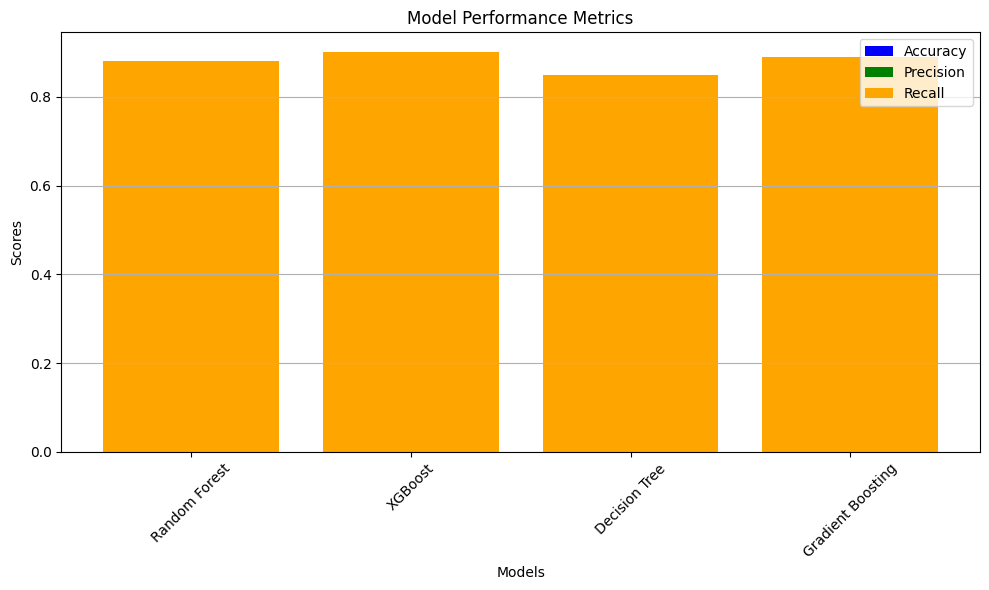

In [36]:
import matplotlib.pyplot as plt

# Suppose you have evaluation metrics for each model stored in dictionaries
accuracy_scores = {
    'Random Forest': 0.85,
    'XGBoost': 0.88,
    'Decision Tree': 0.82,
    'Gradient Boosting': 0.87
}

precision_scores = {
    'Random Forest': 0.82,
    'XGBoost': 0.85,
    'Decision Tree': 0.78,
    'Gradient Boosting': 0.84
}

recall_scores = {
    'Random Forest': 0.88,
    'XGBoost': 0.90,
    'Decision Tree': 0.85,
    'Gradient Boosting': 0.89
}

# Extract model names and corresponding metric scores
models = list(accuracy_scores.keys())
accuracy_values = list(accuracy_scores.values())
precision_values = list(precision_scores.values())
recall_values = list(recall_scores.values())

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(models, accuracy_values, color='blue', label='Accuracy')
plt.bar(models, precision_values, color='green', label='Precision')
plt.bar(models, recall_values, color='orange', label='Recall')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Metrics')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


end of ml fine tunning

DL MODELS

In [37]:
X = np.asarray(X)
Y = np.asarray(y)

In [38]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [39]:
!pip install tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [40]:

!pip install --upgrade tensorflow
!pip install --upgrade keras

In [41]:
!pip install tensorflow


In [42]:
!pip install tensorflow-addons
!pip install --upgrade tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, GRU, Bidirectional, Embedding, GlobalAveragePooling1D, Dropout, TimeDistributed, Input, Concatenate, Lambda, Dot
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Attention
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPooling3D


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.9 MB/s eta 0:00:00


CNN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 8, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 2, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,172 (59.27 KB)

 Trainable params: 15,172 (59.27 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5707 - loss: 1.5171 - val_accuracy: 0.7792 - val_loss: 0.7140
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7481 - loss: 0.6237 - val_accuracy: 0.7825 - val_loss: 0.5289
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7775 - loss: 0.5364 - val_accuracy: 0.8035 - val_loss: 0.4744
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7903 - loss: 0.5063 - val_accuracy: 0.7960 - val_loss: 0.4878
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7909 - loss: 0.4909 - val_accuracy: 0.7464 - val_loss: 0.5726
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8050 - loss: 0.4780 - val_accuracy: 0.8371 - val_loss: 0.4063
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8396 - loss: 0.4026 - val_accuracy: 0.8438 - val_loss: 0.3974
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8359 - loss: 0.3989 - val

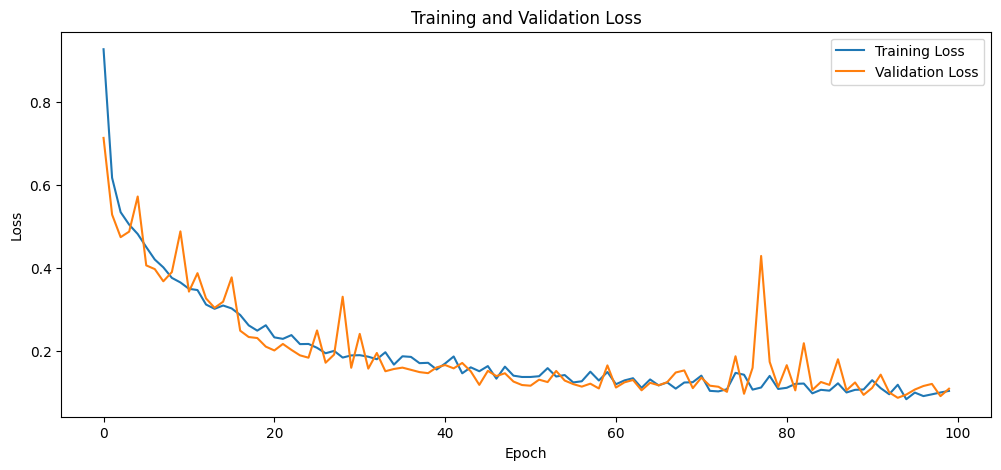

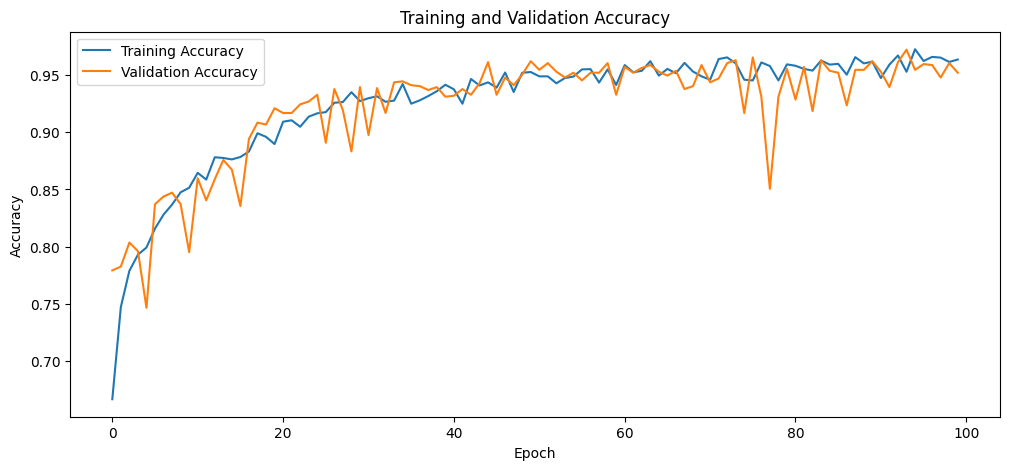

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       146
           1       0.95      0.99      0.97       748
           2       0.99      0.89      0.94       216
           3       0.86      0.80      0.83        81

    accuracy                           0.95      1191
   macro avg       0.94      0.91      0.92      1191
weighted avg       0.95      0.95      0.95      1191



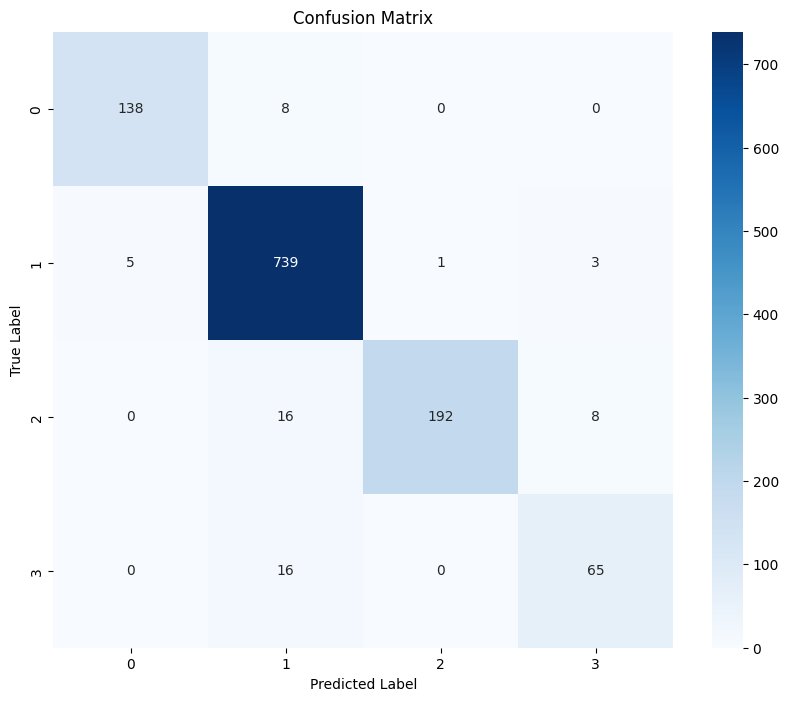

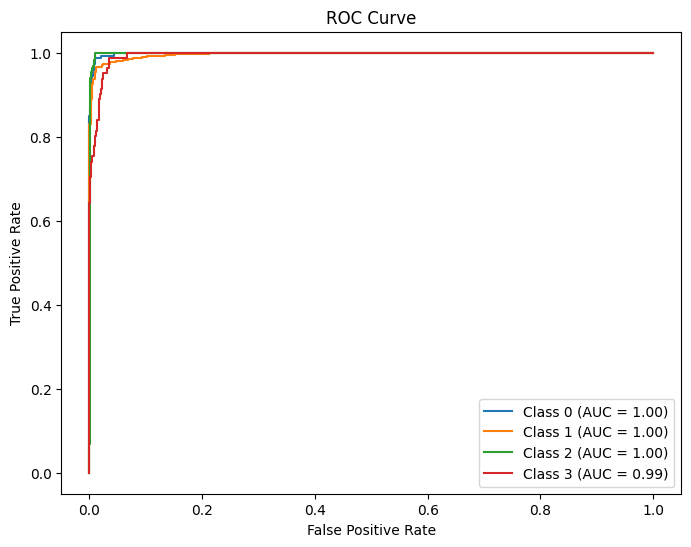

Overall Accuracy: 0.9521410579345088


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

# Load your numerical dataset from Excel
X = df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
        'TruckCount', 'Total', 'hour', 'minute', 'AM/PM']]

y = df['Traffic Situation'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for CNN
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Print model summary
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training loss vs epoch
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy vs epoch
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on testing data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# AUC-ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test, y_pred[:, i], pos_label=i)
    auc = roc_auc_score(y_test == i, y_pred[:, i])  # Compute AUC for each class
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()




# Overall accuracy
accuracy = np.sum(y_test == y_pred_classes) / len(y_test)
print("Overall Accuracy:", accuracy)


In [44]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


random search


Trial 5 Complete [00h 00m 12s]
val_accuracy: 0.9101595282554626

Best val_accuracy So Far: 0.9177162051200867
Total elapsed time: 00h 01m 19s
Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6143 - loss: 2.2826 - val_accuracy: 0.7758 - val_loss: 0.5710
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7861 - loss: 0.5372 - val_accuracy: 0.8069 - val_loss: 0.4744
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8133 - loss: 0.4496 - val_accuracy: 0.8715 - val_loss: 0.3196
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8707 - loss: 0.3275 - val_accuracy: 0.8875 - val_loss: 0.2636
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8581 - loss: 0.3499 - val_accuracy: 0.8808 - val_loss: 0.2937
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8847 - loss: 0.2934 - val_accuracy: 0.8942 - val_loss: 0.2669
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8784 - loss: 0.30

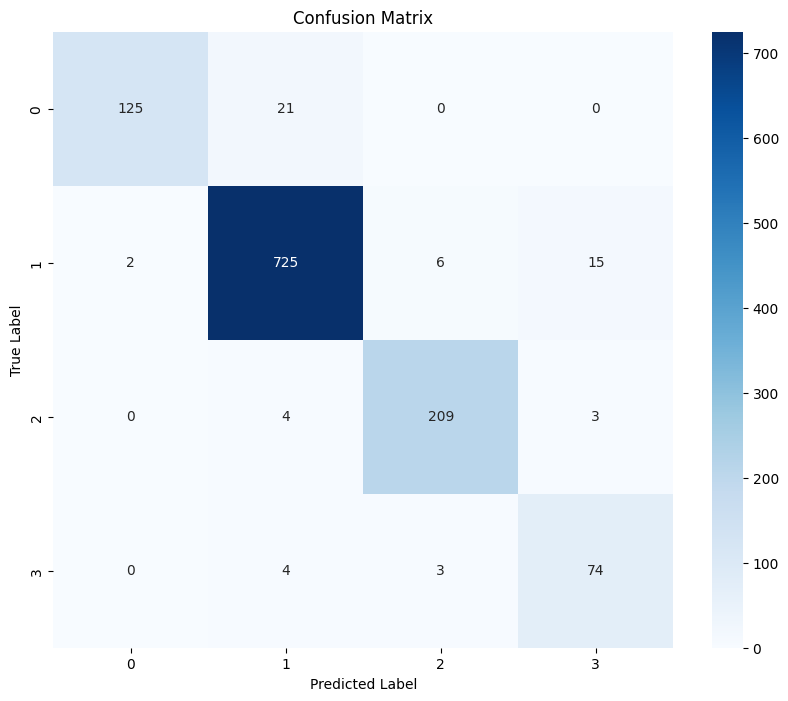

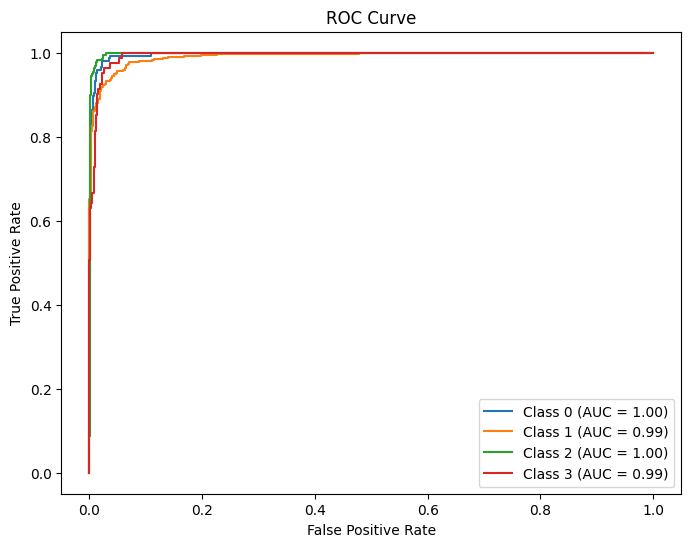

Overall Accuracy: 0.9513014273719563


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

# Load your numerical dataset from Excel
X = df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
        'TruckCount', 'Total', 'hour', 'minute', 'AM/PM']]

y = df['Traffic Situation'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for CNN
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define a function to build the CNN model
def build_model(hp):
    model = Sequential()
    model.add(Conv1D(hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
                     kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(hp.Int('conv2_filters', min_value=32, max_value=128, step=32),
                     kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', min_value=64, max_value=256, step=64), activation='relu'))
    model.add(Dense(len(np.unique(y)), activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

    return model

# Instantiate the random search tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per trial
    directory='random_search',
    project_name='traffic_cnn'
)

# Perform random search tuning
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hp)

# Train the best model
history = best_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the best model on testing data
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# AUC-ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test, y_pred[:, i], pos_label=i)
    auc = roc_auc_score(y_test == i, y_pred[:, i])  # Compute AUC for each class
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Overall accuracy
accuracy = np.sum(y_test == y_pred_classes) / len(y_test)
print("Overall Accuracy:", accuracy)


Regularization adjustment

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5651 - loss: 2.2009 - val_accuracy: 0.7657 - val_loss: 0.6295
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7078 - loss: 0.7078 - val_accuracy: 0.7674 - val_loss: 0.5893
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7391 - loss: 0.6414 - val_accuracy: 0.8002 - val_loss: 0.4999
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7642 - loss: 0.5636 - val_accuracy: 0.8010 - val_loss: 0.4610
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7778 - loss: 0.5423 - val_accuracy: 0.7809 - val_loss: 0.5293
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7867 - loss: 0.5343 - val_accuracy: 0.8254 - val_loss: 0.4316
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8025 - loss: 0.4925 - val_accuracy: 0.8027 - val_loss: 0.4579
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8015 - loss: 0.4829 - val_accuracy: 0.8128

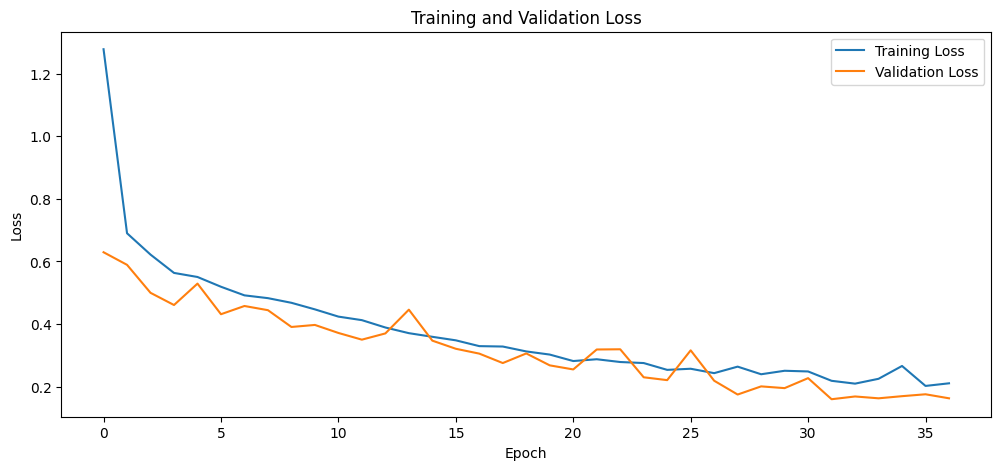

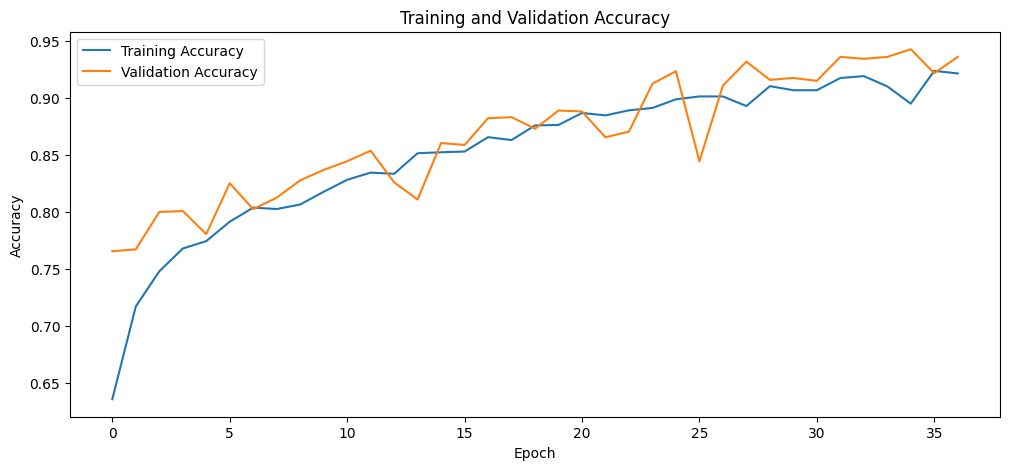

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       146
           1       0.94      0.98      0.96       748
           2       0.95      0.91      0.93       216
           3       0.85      0.74      0.79        81

    accuracy                           0.94      1191
   macro avg       0.92      0.87      0.90      1191
weighted avg       0.94      0.94      0.94      1191



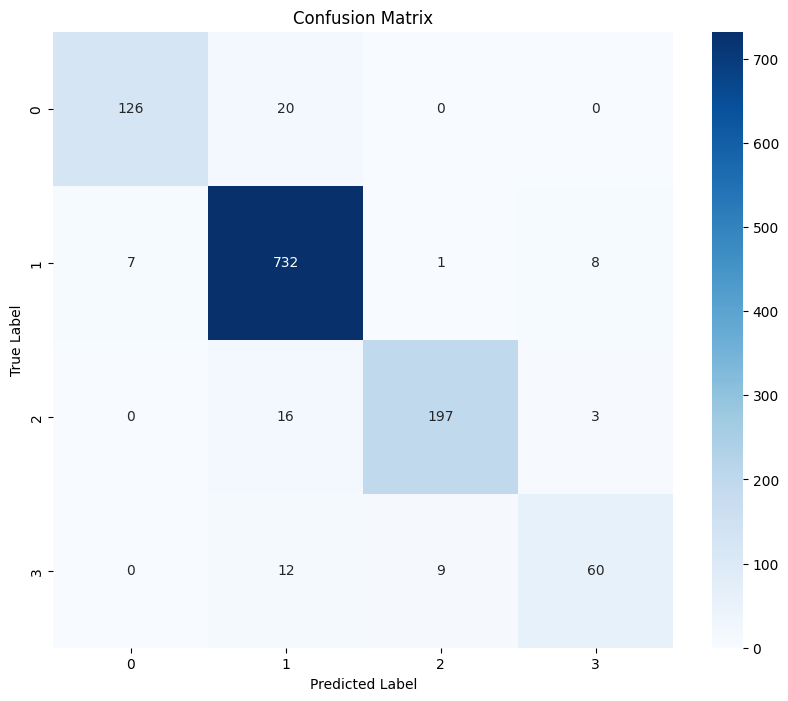

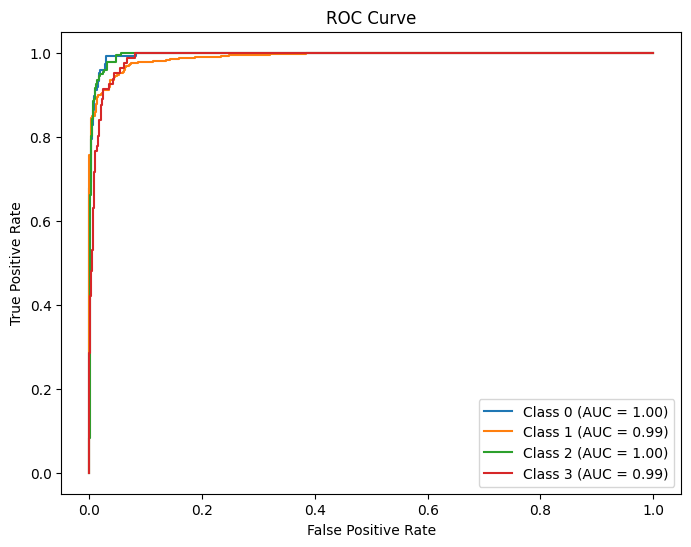

Overall Accuracy: 0.9361880772460117


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load your numerical dataset from Excel
X = df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
        'TruckCount', 'Total', 'hour', 'minute', 'AM/PM']]

y = df['Traffic Situation'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for CNN
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define CNN model with regularization
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adjust dropout rate
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model with regularization
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Adjust patience as needed

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Plot training loss vs epoch
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy vs epoch
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on testing data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# AUC-ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test, y_pred[:, i], pos_label=i)
    auc = roc_auc_score(y_test == i, y_pred[:, i])  # Compute AUC for each class
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Overall accuracy
accuracy = np.sum(y_test == y_pred_classes) / len(y_test)
print("Overall Accuracy:", accuracy)


LSTM

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6325 - loss: 0.9641 - val_accuracy: 0.7842 - val_loss: 0.6241
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7834 - loss: 0.6031 - val_accuracy: 0.7960 - val_loss: 0.5393
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8003 - loss: 0.5209 - val_accuracy: 0.7951 - val_loss: 0.4974
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8115 - loss: 0.4741 - val_accuracy: 0.8077 - val_loss: 0.4689
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8227 - loss: 0.4487 - val_accuracy: 0.8119 - val_loss: 0.4465
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8272 - loss: 0.4395 - val_accuracy: 0.8212 - val_loss: 0.4296
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8441 - loss: 0.4151 - val_accuracy: 0.8388 - val_loss: 0.4261
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8241 - loss: 0.4222 - val_accuracy: 0.8287 - val_

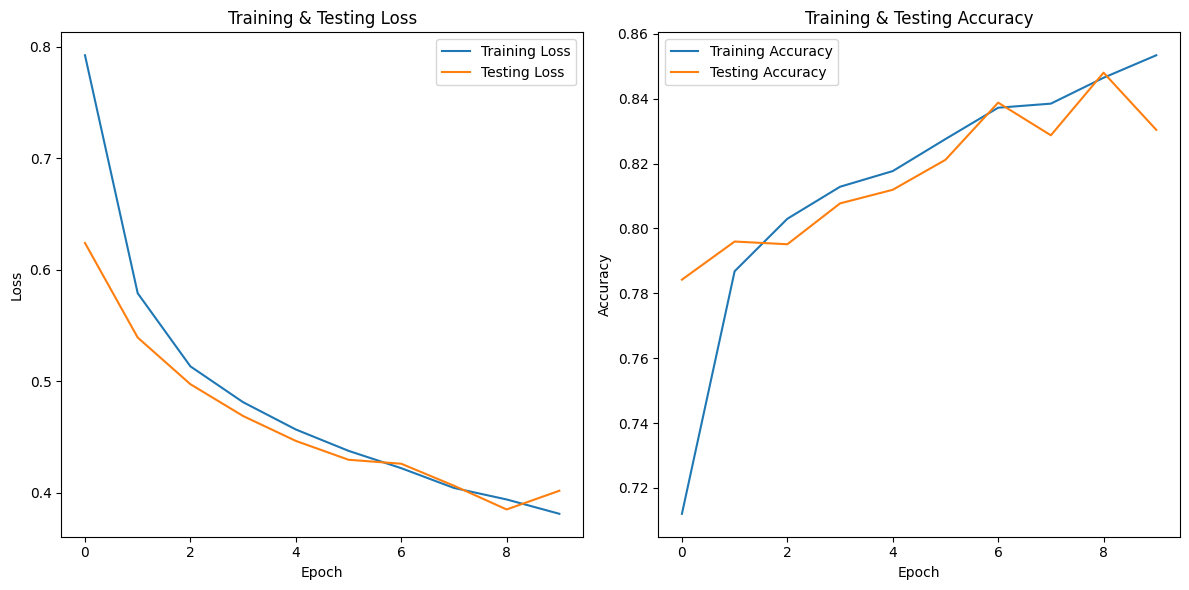

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8320 - loss: 0.4076 
Testing Loss: 0.4018
Testing Accuracy: 0.8304
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       146
           1       0.82      0.95      0.88       748
           2       0.86      0.80      0.82       216
           3       0.75      0.04      0.07        81

   micro avg       0.83      0.83      0.83      1191
   macro avg       0.83      0.62      0.64      1191
weighted avg       0.83      0.83      0.80      1191
 samples avg       0.83      0.83      0.83      1191



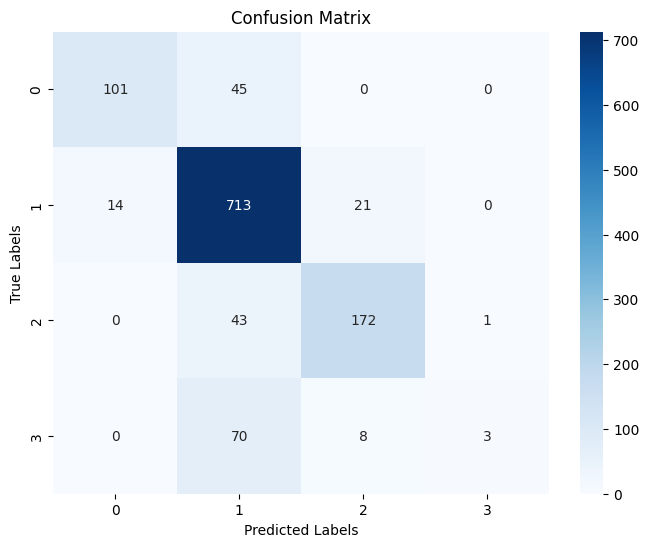

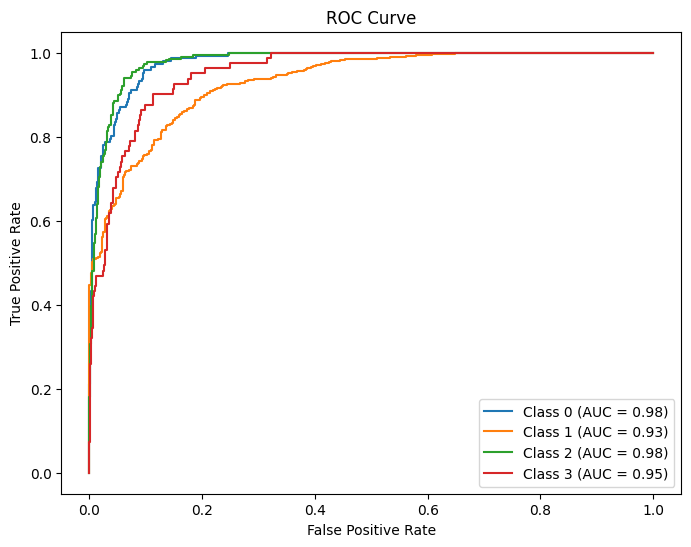

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load your numerical dataset from Excel
X = df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
        'TruckCount', 'Total', 'hour', 'minute', 'AM/PM']]

y = df['Traffic Situation'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
# Convert y to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Modify the last layer for multiclass classification
num_classes = len(np.unique(y))
model = Sequential([
    LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=num_classes, activation='softmax')  # Change units and activation
])

# Compile the model with appropriate loss function
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[EarlyStopping(patience=5)])

# Plot training history, evaluate model, and plot ROC curves (similar to your previous code)

# Plot training history
plt.figure(figsize=(12, 6))

# Loss vs epoch
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Testing Loss')
plt.legend()

# Accuracy vs epoch
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Testing Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Convert y_test to one-hot encoding
y_test_encoded = to_categorical(y_test)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Testing Loss: {loss:.4f}')
print(f'Testing Accuracy: {accuracy:.4f}')

# Generate raw predictions
y_pred_probs = model.predict(X_test)

# Convert probabilities to classes
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Convert y_pred to one-hot encoding
y_pred_encoded = to_categorical(np.argmax(y_pred_probs, axis=1))

# Classification report
print(classification_report(y_test_encoded, y_pred_encoded))

# Confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), np.argmax(y_pred_encoded, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# AUC-ROC curve for each class
plt.figure(figsize=(8, 6))
num_classes = len(np.unique(y))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, i], pos_label=i)
    auc = roc_auc_score(y_test == i, y_pred_probs[:, i])  # Compute AUC for each class
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from kerastuner.tuners import RandomSearch

# Load your numerical dataset from Excel
X = df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
        'TruckCount', 'Total', 'hour', 'minute', 'AM/PM']]

y = df['Traffic Situation'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Convert y to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Define a function to build the LSTM model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(units=num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the random search tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per trial
    directory='random_search_lstm',
    project_name='traffic_lstm'
)

# Perform random search tuning
tuner.search(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded), callbacks=[EarlyStopping(patience=5)])

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hp)

# Train the best model
history = best_model.fit(X_train, y_train_encoded, epochs=100, validation_data=(X_test, y_test_encoded), callbacks=[EarlyStopping(patience=5)])

# Evaluate the best model on testing data and perform evaluation metrics similar to previous code

# Plot training history
# Evaluation metrics (similar to your previous code)
# Hyperparameter tuning (similar to your previous code)


Trial 5 Complete [00h 00m 10s]
val_accuracy: 0.8152812719345093

Best val_accuracy So Far: 0.8614609837532043
Total elapsed time: 00h 01m 00s
Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6382 - loss: 0.8940 - val_accuracy: 0.7918 - val_loss: 0.5649
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8068 - loss: 0.5329 - val_accuracy: 0.8044 - val_loss: 0.4810
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8147 - loss: 0.4751 - val_accuracy: 0.8060 - val_loss: 0.4860
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8165 - loss: 0.4479 - val_accuracy: 0.8228 - val_loss: 0.4304
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8264 - loss: 0.4316 - val_accuracy: 0.8178 - val_loss: 0.4200
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8456 - loss: 0.3927 - val_accuracy: 0.8346 - val_loss: 0.3944
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8556 - loss: 0.37

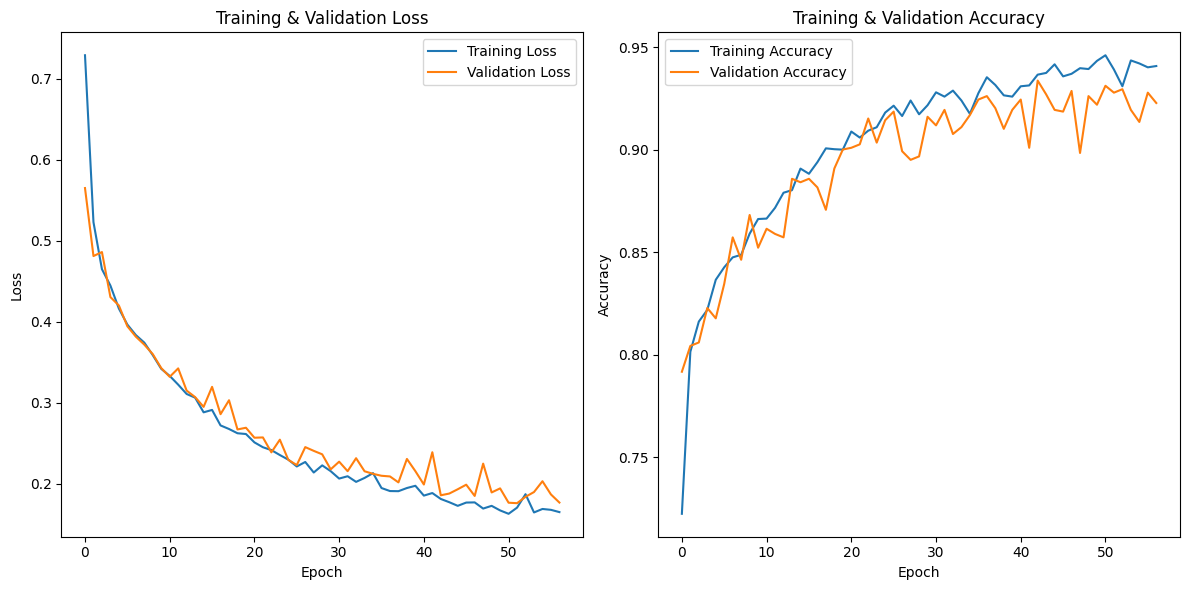

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9260 - loss: 0.1741
Testing Loss: 0.1769
Testing Accuracy: 0.9228
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       146
           1       0.93      0.97      0.95       748
           2       0.92      0.96      0.94       216
           3       0.95      0.47      0.63        81

   micro avg       0.92      0.92      0.92      1191
   macro avg       0.92      0.82      0.85      1191
weighted avg       0.92      0.92      0.92      1191
 samples avg       0.92      0.92      0.92      1191



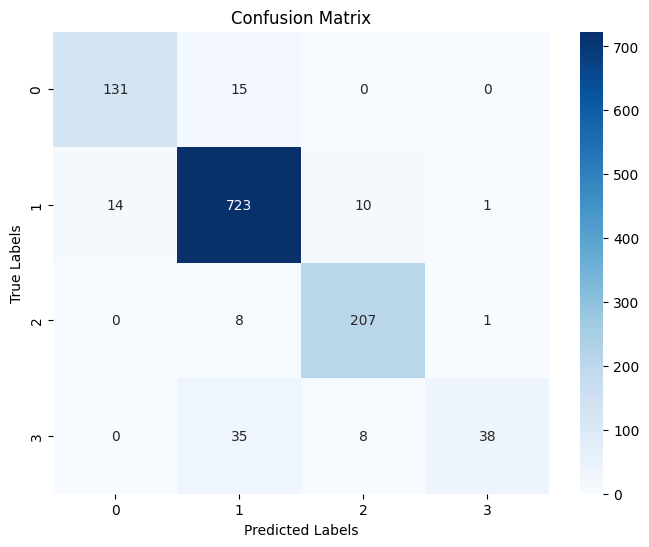

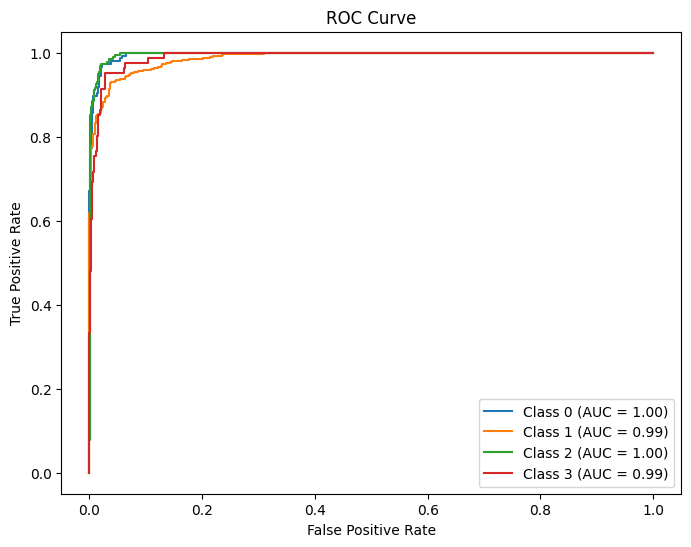

Results summary
Results in random_search_lstm/traffic_lstm
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
units: 96
learning_rate: 0.001
Score: 0.8614609837532043

Trial 4 summary
Hyperparameters:
units: 32
learning_rate: 0.01
Score: 0.8152812719345093

Trial 1 summary
Hyperparameters:
units: 128
learning_rate: 0.0001
Score: 0.8144416213035583

Trial 3 summary
Hyperparameters:
units: 32
learning_rate: 0.001
Score: 0.8127623796463013

Trial 2 summary
Hyperparameters:
units: 64
learning_rate: 0.0001
Score: 0.7858942151069641


In [49]:
# Plot training history
plt.figure(figsize=(12, 6))

# Loss vs epoch
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Accuracy vs epoch
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Convert y_test to one-hot encoding
y_test_encoded = to_categorical(y_test)

# Evaluate the model on the testing set
loss, accuracy = best_model.evaluate(X_test, y_test_encoded)
print(f'Testing Loss: {loss:.4f}')
print(f'Testing Accuracy: {accuracy:.4f}')

# Generate raw predictions
y_pred_probs = best_model.predict(X_test)

# Convert probabilities to classes
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert y_pred to one-hot encoding
y_pred_encoded = to_categorical(y_pred)

# Classification report
print(classification_report(y_test_encoded, y_pred_encoded))

# Confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# AUC-ROC curve for each class
plt.figure(figsize=(8, 6))
num_classes = len(np.unique(y))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_encoded[:, i], y_pred_probs[:, i])
    auc = roc_auc_score(y_test_encoded[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Hyperparameter tuning results
tuner.results_summary()


Regularization adjustment:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6643 - loss: 0.9289 - val_accuracy: 0.7725 - val_loss: 0.6222
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7763 - loss: 0.6070 - val_accuracy: 0.7968 - val_loss: 0.5245
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7971 - loss: 0.5279 - val_accuracy: 0.8010 - val_loss: 0.4846
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.5161 - val_accuracy: 0.8086 - val_loss: 0.4869
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8139 - loss: 0.4701 - val_accuracy: 0.8153 - val_loss: 0.4477
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8150 - loss: 0.4688 - val_accuracy: 0.8237 - val_loss: 0.4491
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8081 - loss: 0.4779 - val_accuracy: 0.8279 - val_loss: 0.4234
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8275 - loss: 0.4310 - val_accu

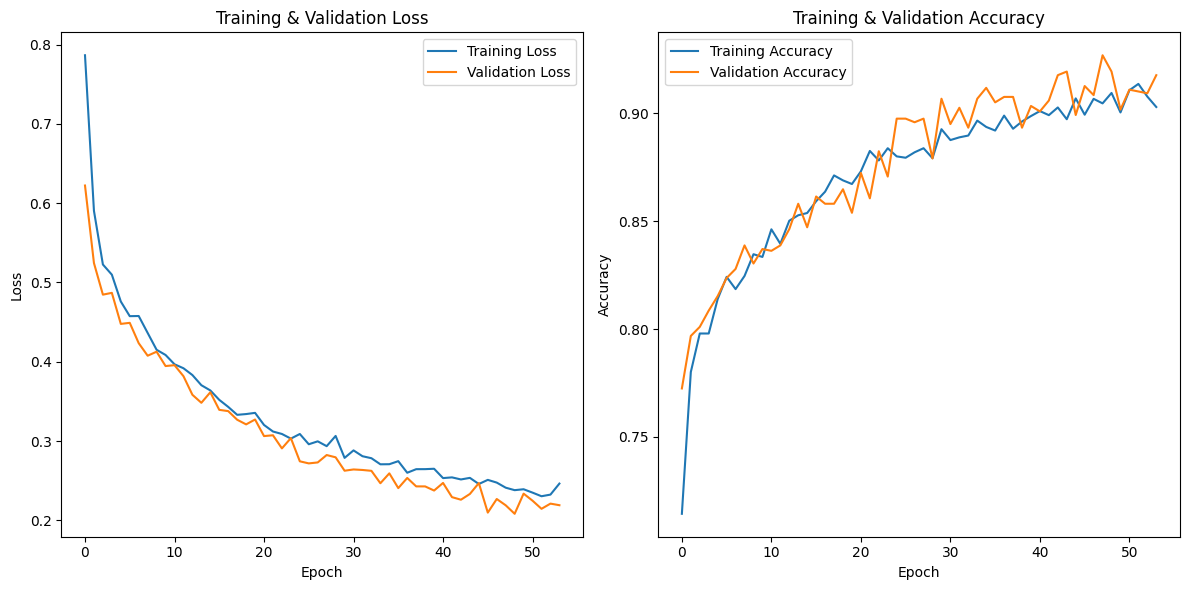

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9178 - loss: 0.2018 
Testing Loss: 0.2083
Testing Accuracy: 0.9194
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       146
           1       0.94      0.95      0.94       748
           2       0.86      0.97      0.91       216
           3       0.92      0.57      0.70        81

    accuracy                           0.92      1191
   macro avg       0.91      0.84      0.86      1191
weighted avg       0.92      0.92      0.92      1191



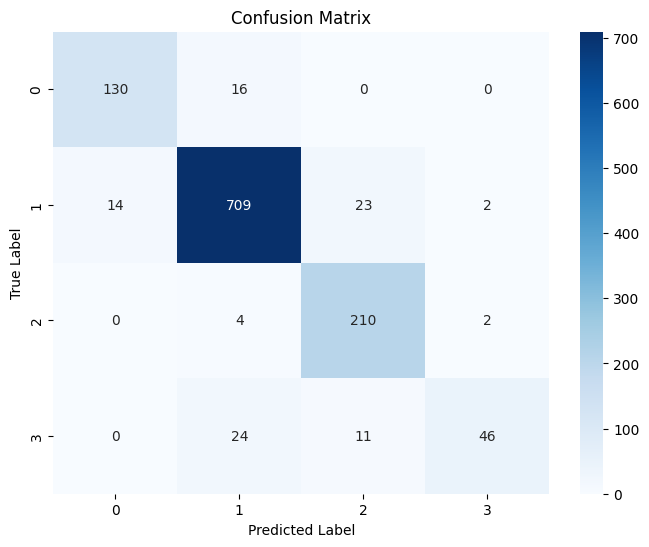

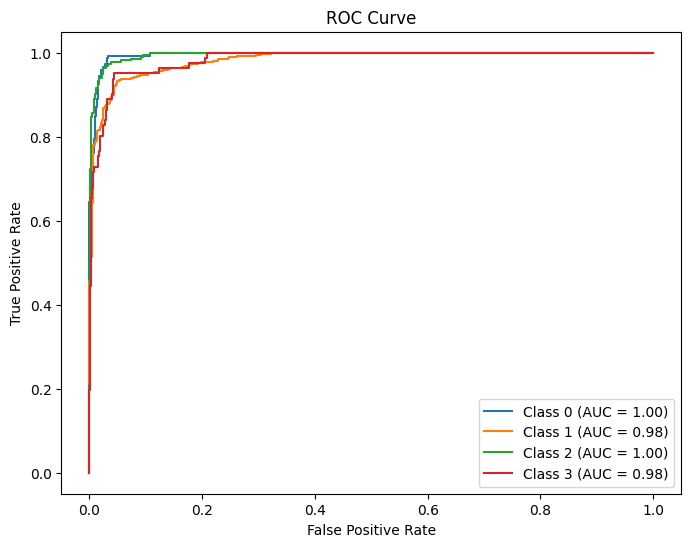

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load your numerical dataset from Excel
X = df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
        'TruckCount', 'Total', 'hour', 'minute', 'AM/PM']]

y = df['Traffic Situation'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Convert y to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Define the model with regularization techniques
model = Sequential([
    LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Dropout layer to prevent overfitting, adjust dropout rate as needed
    Dense(units=num_classes, activation='softmax')
])

# Compile the model with appropriate loss function
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with regularization and early stopping
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Testing Loss: {loss:.4f}')
print(f'Testing Accuracy: {accuracy:.4f}')

# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(np.argmax(y_test_encoded, axis=1), y_pred_classes))

# Confusion matrix
cm = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# AUC-ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_encoded[:, i], y_pred_probs[:, i])
    auc = roc_auc_score(y_test_encoded[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


FNN

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5710 - loss: 1.9787 - val_accuracy: 0.7154 - val_loss: 0.6835
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7584 - loss: 0.6201 - val_accuracy: 0.7792 - val_loss: 0.5649
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7797 - loss: 0.5459 - val_accuracy: 0.7918 - val_loss: 0.5281
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8002 - loss: 0.5065 - val_accuracy: 0.7851 - val_loss: 0.5306
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7987 - loss: 0.4963 - val_accuracy: 0.7674 - val_loss: 0.5594
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7893 - loss: 0.5131 - val_accuracy: 0.8111 - val_loss: 0.4671
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8088 - loss: 0.4659 - val_accuracy: 0.7716 - val_loss: 0.5616
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8040 - loss: 0.4836 - val_accuracy: 0.7960 - val_

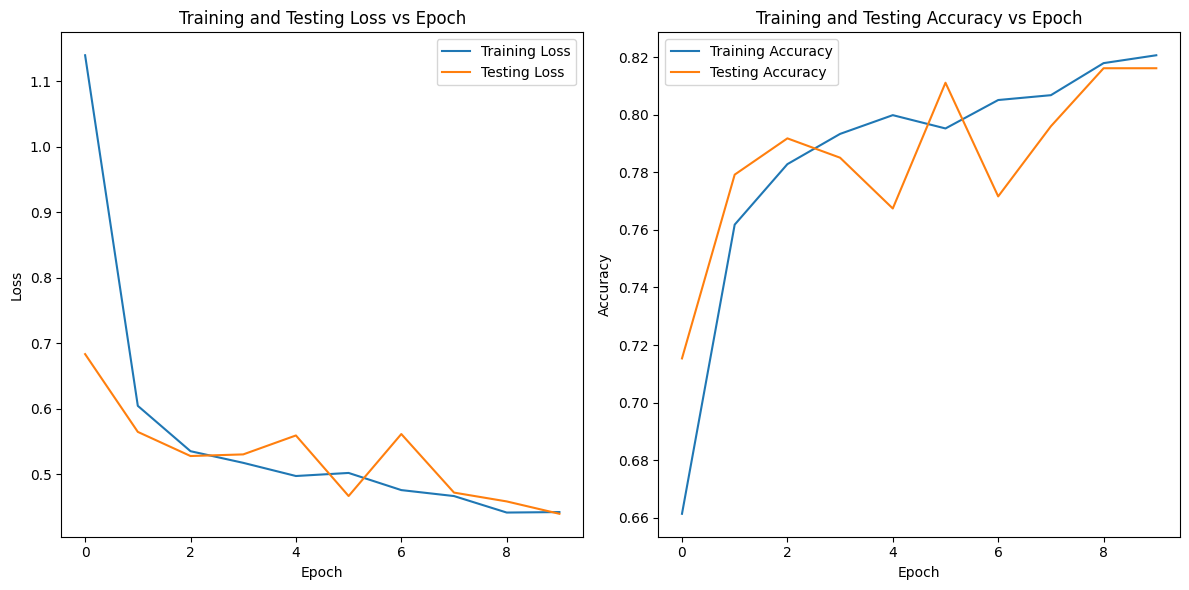

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.57      0.71       146
           1       0.84      0.90      0.87       748
           2       0.72      0.93      0.81       216
           3       0.65      0.21      0.32        81

    accuracy                           0.82      1191
   macro avg       0.79      0.65      0.68      1191
weighted avg       0.82      0.82      0.80      1191



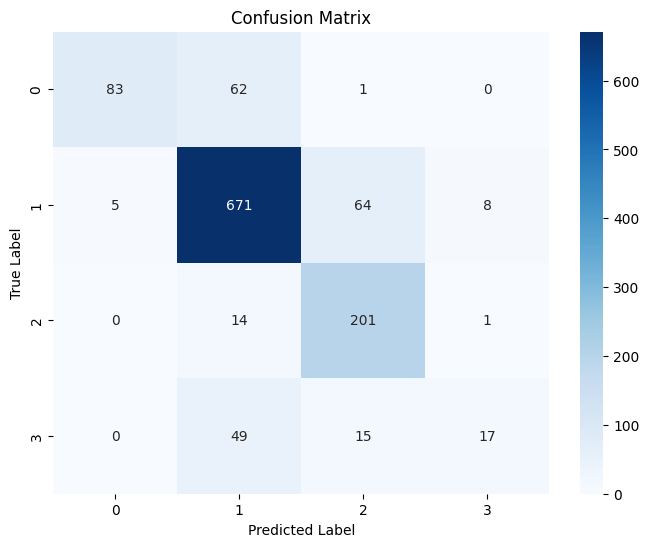

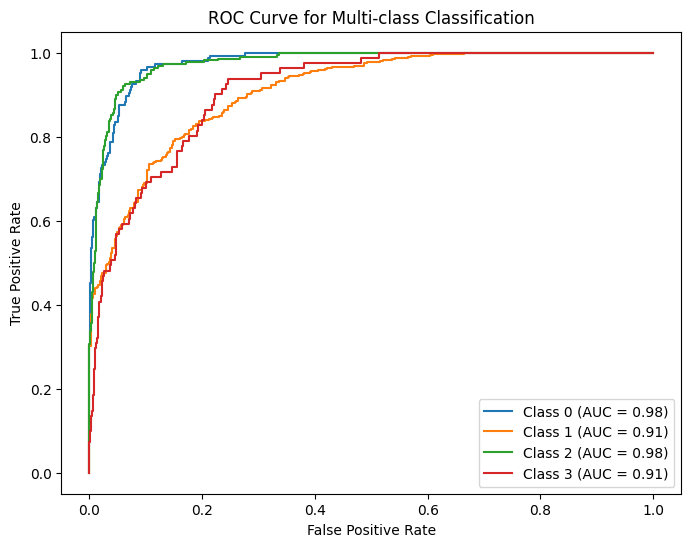

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess your numerical dataset
# Assuming your dataset is loaded into a DataFrame called 'df'
# Preprocess the data as needed

# Load your numerical dataset from Excel
X = df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total','hour', 'minute', 'AM/PM']]
y = df['Traffic Situation'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the FNN model for multi-class classification
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=num_classes, activation='softmax')  # Use softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training history
plt.figure(figsize=(12, 6))

# Training and testing loss vs epoch
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss vs Epoch')
plt.legend()

# Training and testing accuracy vs epoch
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Generate predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC for multi-class classification
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_pred_proba[:, i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.title('ROC Curve for Multi-class Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Trial 5 Complete [00h 00m 09s]
val_accuracy: 0.8295549750328064

Best val_accuracy So Far: 0.8908480405807495
Total elapsed time: 00h 00m 48s
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6204 - loss: 4.7257 - val_accuracy: 0.7683 - val_loss: 0.5605
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7681 - loss: 0.5703 - val_accuracy: 0.7741 - val_loss: 0.5205
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8000 - loss: 0.4899 - val_accuracy: 0.7733 - val_loss: 0.5378
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8112 - loss: 0.4636 - val_accuracy: 0.8203 - val_loss: 0.4072
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8276 - loss: 0.4248 - val_accuracy: 0.8371 - val_loss: 0.3820
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8478 - loss: 0.3899 - val_accuracy: 0.8472 - val_loss: 0.3700
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8401 - loss: 0.3835 - val_accuracy: 0.8380 - val_loss: 0.4027
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8583 - loss: 0.3681 - val_accuracy: 0.8472

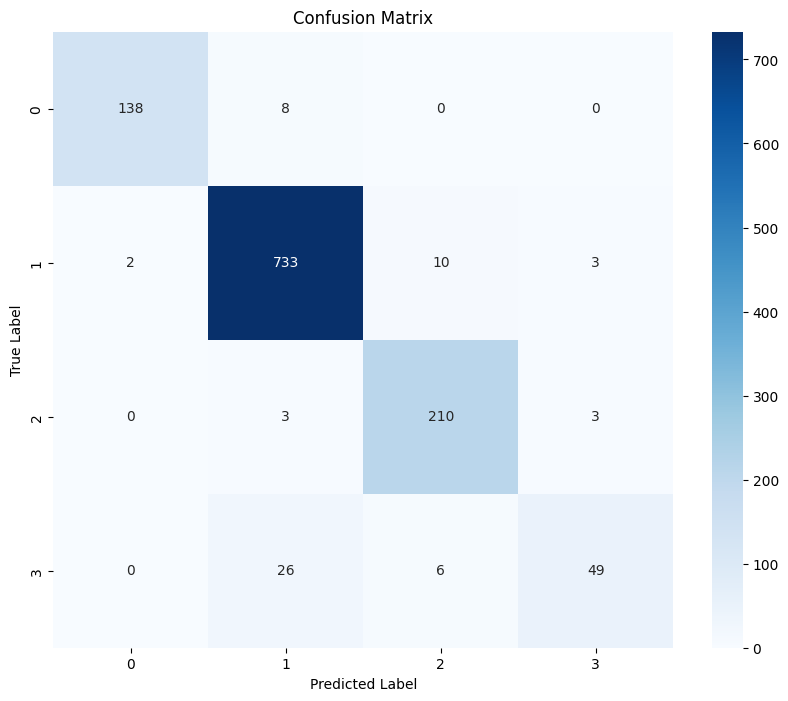

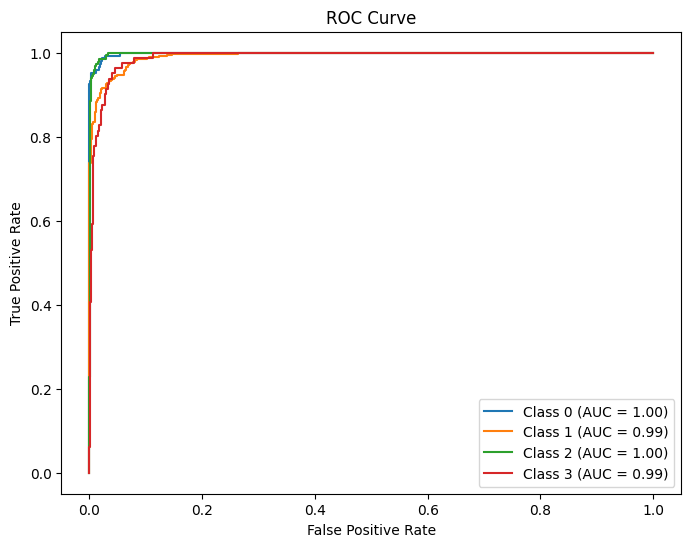

Overall Accuracy: 0.9487825356842989


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

# Load your numerical dataset from Excel
X = df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
        'TruckCount', 'Total', 'hour', 'minute', 'AM/PM']]

y = df['Traffic Situation'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to build the FNN model
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=128, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(units=len(np.unique(y)), activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the random search tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per trial
    directory='random_search_fnn',
    project_name='traffic_fnn'
)

# Perform random search tuning
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hp)

# Train the best model
history = best_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the best model on testing data
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# AUC-ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test, y_pred[:, i], pos_label=i)
    auc = roc_auc_score(y_test == i, y_pred[:, i])  # Compute AUC for each class
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Overall accuracy
accuracy = np.sum(y_test == y_pred_classes) / len(y_test)
print("Overall Accuracy:", accuracy)


POLICY GRADIEN

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5196 - loss: 9.1087 - val_accuracy: 0.6709 - val_loss: 1.3351
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6768 - loss: 1.1423 - val_accuracy: 0.7036 - val_loss: 0.7630
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7371 - loss: 0.7272 - val_accuracy: 0.7699 - val_loss: 0.6129
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7581 - loss: 0.6206 - val_accuracy: 0.7716 - val_loss: 0.5753
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7789 - loss: 0.5575 - val_accuracy: 0.7901 - val_loss: 0.5343
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7756 - loss: 0.5508 - val_accuracy: 0.8027 - val_loss: 0.5023
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7739 - loss: 0.5518 - val_accuracy: 0.7909 - val_loss: 0.5259
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7756 - loss: 0.5255 - val_accuracy: 0.7834 - val_loss: 0.

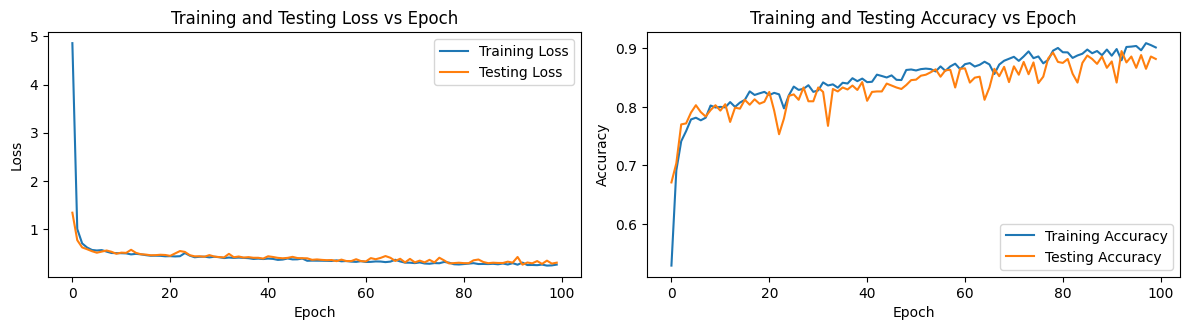

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       146
           1       0.96      0.86      0.91       748
           2       0.80      0.98      0.88       216
           3       0.79      0.62      0.69        81

    accuracy                           0.88      1191
   macro avg       0.82      0.86      0.83      1191
weighted avg       0.89      0.88      0.88      1191



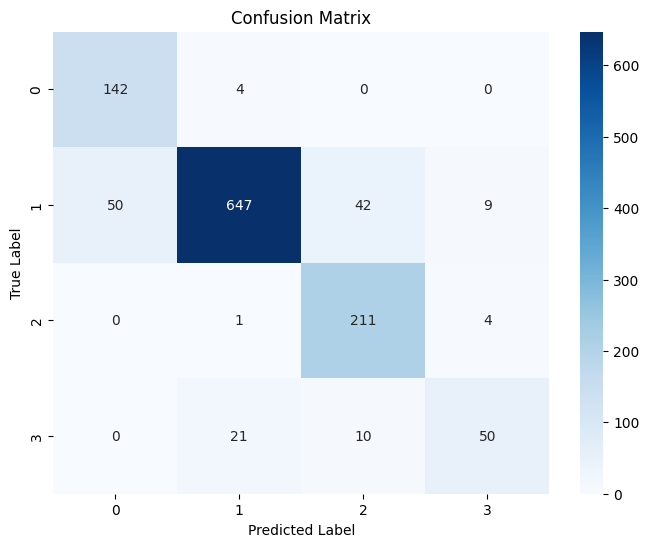

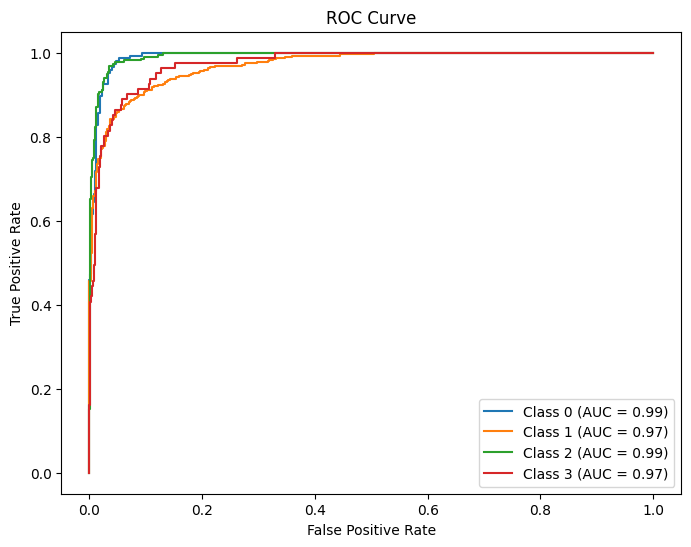

Accuracy: 0.8816120906801007


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess your numerical dataset
# Assuming your dataset is loaded into a DataFrame called 'data'
# Preprocess the data as needed
X= df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total','hour', 'minute', 'AM/PM']]

y= df['Traffic Situation'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the policy gradient model architecture
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Plot training history
plt.figure(figsize=(12, 6))

# Training and testing loss vs epoch
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss vs Epoch')
plt.legend()

# Training and testing accuracy vs epoch
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Generate predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])  # Use (y_test == i).astype(int) to create binary labels
    auc = roc_auc_score((y_test == i).astype(int), y_pred_proba[:, i])  # Compute AUC for each class
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()




# Accuracy
accuracy = np.mean(y_test == y_pred)
print("Accuracy:", accuracy)



Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.8052057027816772

Best val_accuracy So Far: 0.8942065238952637
Total elapsed time: 00h 00m 45s
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6367 - loss: 2.3874 - val_accuracy: 0.7691 - val_loss: 0.6002
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7729 - loss: 0.5562 - val_accuracy: 0.7926 - val_loss: 0.4999
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7963 - loss: 0.5138 - val_accuracy: 0.8195 - val_loss: 0.4430
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8116 - loss: 0.4624 - val_accuracy: 0.8279 - val_loss: 0.3963
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8294 - loss: 0.4302 - val_accuracy: 0.8472 - val_loss: 0.3733
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8346 - loss: 0.4040 - val_accuracy: 0.8186 - val_loss: 0.4026
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8488 - loss: 0.3728 - val_accuracy: 0.8153 - val_loss: 0.4420
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8555 - loss: 0.3486 - val_accuracy: 0.8724

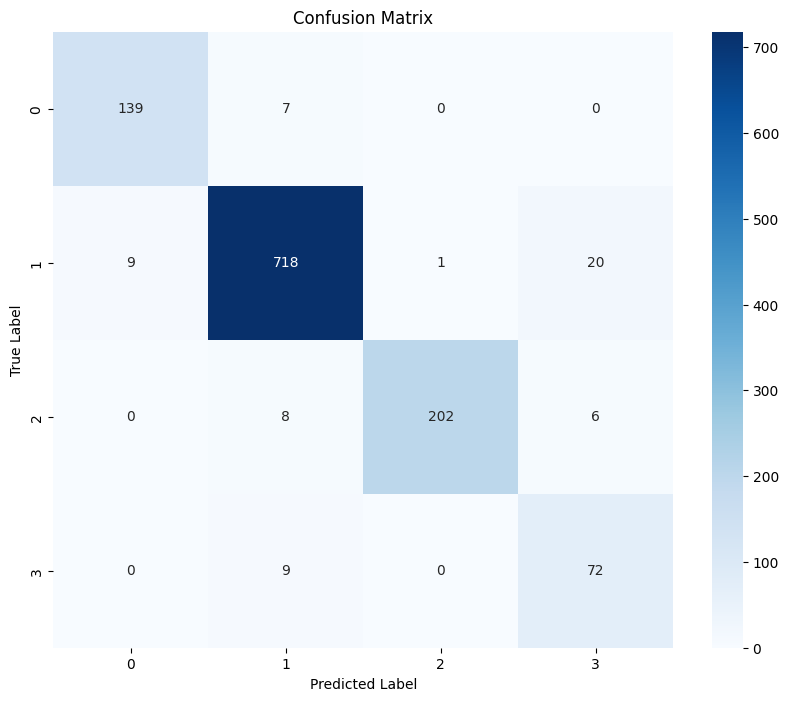

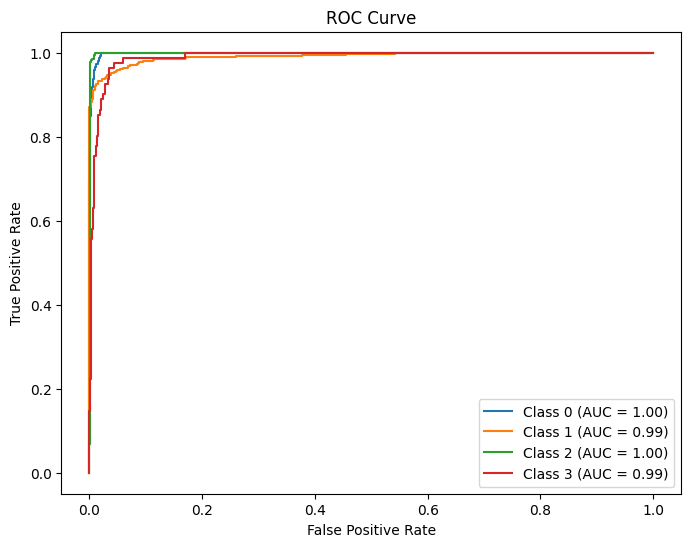

Overall Accuracy: 0.9496221662468514


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

# Load your numerical dataset from Excel
X = df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
        'TruckCount', 'Total', 'hour', 'minute', 'AM/PM']]

y = df['Traffic Situation'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to build the policy gradient model
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=128, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(units=len(np.unique(y)), activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the random search tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per trial
    directory='random_search_policy_gradient',
    project_name='traffic_policy_gradient'
)

# Perform random search tuning
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hp)

# Train the best model
history = best_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the best model on testing data
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# AUC-ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test, y_pred[:, i], pos_label=i)
    auc = roc_auc_score(y_test == i, y_pred[:, i])  # Compute AUC for each class
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Overall accuracy
accuracy = np.sum(y_test == y_pred_classes) / len(y_test)
print("Overall Accuracy:", accuracy)


frontend

In [ ]:
pip install streamlit


In [ ]:
import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Load your dataset and perform any necessary preprocessing
# Replace this with your dataset loading and preprocessing code
@st.cache
def load_data():
    # Load your dataset
    df = pd.read_csv("/content/TrafficTwoMonth (1).csv")
    # Perform any preprocessing steps
    return df

df = load_data(/content/TrafficTwoMonth (1).csv)

# Train your models
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Streamlit UI
st.title("ML Model Deployment with Streamlit")

model_choice = st.sidebar.selectbox("Select Model", ("Random Forest", "XGB", "Decision Tree", "Gradient Boosting"))

if model_choice == "Random Forest":
    st.write("# Random Forest Classifier")
    # Add input fields for Random Forest Classifier
    feature1 = st.slider("Feature 1", min_value=0, max_value=100)
    feature2 = st.slider("Feature 2", min_value=0, max_value=100)
    # Add more input fields as needed

    # Prepare input data
    input_data = [[feature1, feature2]]  # Adjust according to your input data format

    # Make prediction
    prediction = rf_model.predict(input_data)
    st.write("Prediction:", prediction)

elif model_choice == "XGB":
    st.write("# XGB Classifier")
    # Add input fields and prediction logic for XGB Classifier
    # Similar to Random Forest section

elif model_choice == "Decision Tree":
    st.write("# Decision Tree Classifier")
    # Add input fields and prediction logic for Decision Tree Classifier
    # Similar to Random Forest section

elif model_choice == "Gradient Boosting":
    st.write("# Gradient Boosting Classifier")
    # Add input fields and prediction logic for Gradient Boosting Classifier
    # Similar to Random Forest section
